## O que é uma variável aleatória?

In [1]:
import pandas as pd


dados = pd.read_csv('../Database/marketing_data.csv')

print(f"shape dos dados: {dados.shape}")

dados.head(10)

shape dos dados: (120, 17)


,id_cliente,sucesso,idade,ocupacao,estado_civil,educacao_formal,produto_credito,produto_fin_imob,npl_90,tipo_contato,mes_contato,dia_semana_contato,num_contatos,dias_ult_contato,num_prev_conato,sucesso_prev,saldo
0,DNXO0711,nao,45,industria,casado,medio_completo,nao,sim,nd,email,jun,sex,3,999,0,nao_aplica,13000.42
1,DNXO0712,nao,46,ti,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.43
2,DNXO0713,nao,47,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.44
3,DNXO0714,nao,48,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.45
4,DNXO0715,nao,49,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.46
5,DNXO0716,nao,50,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.47
6,DNXO0717,nao,51,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.48
7,DNXO0718,nao,52,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.49
8,DNXO0719,nao,53,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.50
9,DNXO0720,nao,54,industria,casado,ensino_superior,nao,sim,nao,whatsapp,ago,qua,1,999,0,nao_aplica,13000.51


In [2]:
dados[['id_cliente', 'sucesso', 'idade', 'tipo_contato', 'dia_semana_contato', 'saldo']].head(15)

,id_cliente,sucesso,idade,tipo_contato,dia_semana_contato,saldo
0,DNXO0711,nao,45,email,sex,13000.42
1,DNXO0712,nao,46,whatsapp,qua,13000.43
2,DNXO0713,nao,47,whatsapp,qua,13000.44
3,DNXO0714,nao,48,whatsapp,qua,13000.45
4,DNXO0715,nao,49,whatsapp,qua,13000.46
5,DNXO0716,nao,50,whatsapp,qua,13000.47
6,DNXO0717,nao,51,whatsapp,qua,13000.48
7,DNXO0718,nao,52,whatsapp,qua,13000.49
8,DNXO0719,nao,53,whatsapp,qua,13000.50
9,DNXO0720,nao,54,whatsapp,qua,13000.51


## Atributos que são variáveis categóricas

In [3]:
dados[['dia_semana_contato']].head(10)

,dia_semana_contato
0,sex
1,qua
2,qua
3,qua
4,qua
5,qua
6,qua
7,qua
8,qua
9,qua


## Atributos que são variáveis discretas

In [4]:
dados[['idade']].head(10)

,idade
0,45
1,46
2,47
3,48
4,49
5,50
6,51
7,52
8,53
9,54


## Atributos que são variáveis contínuas

In [5]:
dados[['saldo']].head(10)

,saldo
0,13000.42
1,13000.43
2,13000.44
3,13000.45
4,13000.46
5,13000.47
6,13000.48
7,13000.49
8,13000.50
9,13000.51


## Estimando medidas descritivas

In [6]:
dados[['idade']].describe().T

,count,mean,std,min,25%,50%,75%,max
idade,120.0,104.5,34.785054,45.0,74.75,104.5,134.25,164.0


In [7]:
dados[['saldo']].describe().T

,count,mean,std,min,25%,50%,75%,max
saldo,120.0,13002.23,1.968056,13000.42,13000.7175,13001.015,13004.0125,13007.01


In [8]:
dados.groupby('sucesso')['saldo'].mean()

sucesso
nao    13001.255714
sim    13005.287241
Name: saldo, dtype: float64

## Convertendo eventos em variáveis aleatórias

In [9]:
dados['sucesso'] = dados['sucesso'].apply(lambda x: 1 if x == 'sim' else 0)
dados.groupby('dia_semana_contato')[['sucesso']].mean().sort_values(by='sucesso', ascending=False)

,sucesso
dia_semana_contato,
dom,1.000000
seg,1.000000
ter,1.000000
qui,0.333333
sex,0.333333
sab,0.291667
qua,0.057692


In [10]:
dados['sucesso_va'] = dados['sucesso'].apply(lambda x: 1 if x == 'sim' else 0) # Convertendo o evento de contratação em variável aleatória.

display(dados['sucesso'].value_counts())
display(dados['sucesso_va'].value_counts())

sucesso
0    91
1    29
Name: count, dtype: int64

sucesso_va
0    120
Name: count, dtype: int64

## Medidas descritivas condicionais

In [11]:
dados =pd.read_csv('../Database/marketing_data.csv')

dados.groupby('sucesso')[['saldo', 'idade']].mean()

,saldo,idade
sucesso,,
nao,13001.255714,90.0
sim,13005.287241,150.0


In [12]:
dados['sucesso_va'] = dados['sucesso'].apply(lambda x: 1 if x == 'sim' else 0) # Convertendo o evento de contratação em variável aleatória.

display(dados['sucesso'].value_counts())
display(dados['sucesso_va'].value_counts())

sucesso
nao    91
sim    29
Name: count, dtype: int64

sucesso_va
0    91
1    29
Name: count, dtype: int64

In [13]:
dist_prob = pd.DataFrame(dados['sucesso_va'].value_counts().reset_index(drop=False))
dist_prob.columns = ['X', 'frequencia']
dist_prob['P(X=x)'] = dist_prob['frequencia'].apply(lambda x: x / sum(dist_prob['frequencia']))
dist_prob.drop('frequencia', axis=1)

,X,P(X=x)
0,0,0.758333
1,1,0.241667


## Visualizando distribuições de probalidade

In [14]:
probs = [
    0.06, 0.01, 0.01, 0.01, 0.01, 0.2, 0.1, 0.15, 0.1, 0.15, 0.2
]

import pandas as pd

df = pd.DataFrame(probs, columns=['prob'])
df['prob_cum'] = df['prob'].cumsum()

Text(0, 0.5, 'Probabilidade')

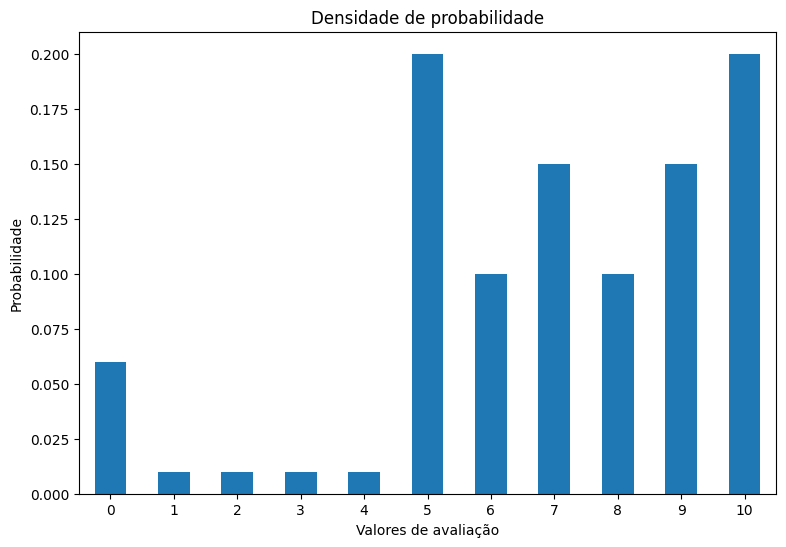

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 6))

df['prob'].plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Densidade de probabilidade')
plt.xlabel('Valores de avaliação')
plt.ylabel('Probabilidade')

Text(0, 0.5, 'Probabilidade acumulada')

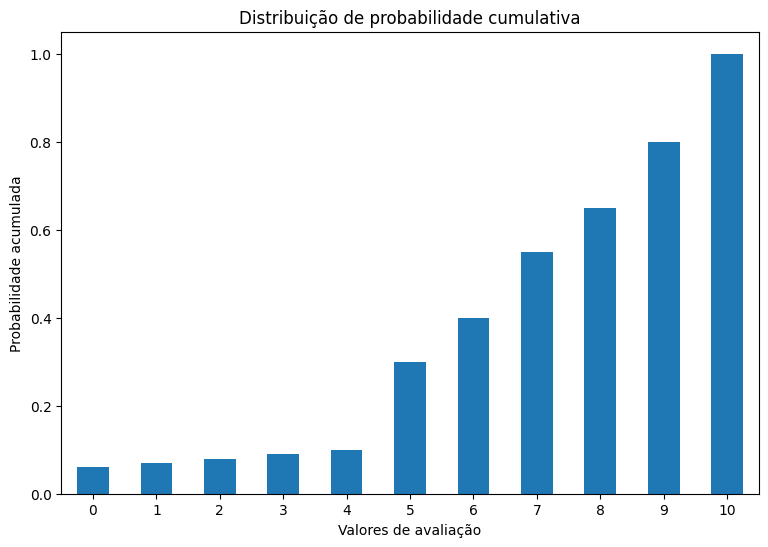

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 6))

df['prob_cum'].plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Distribuição de probabilidade cumulativa')
plt.xlabel('Valores de avaliação')
plt.ylabel('Probabilidade acumulada')